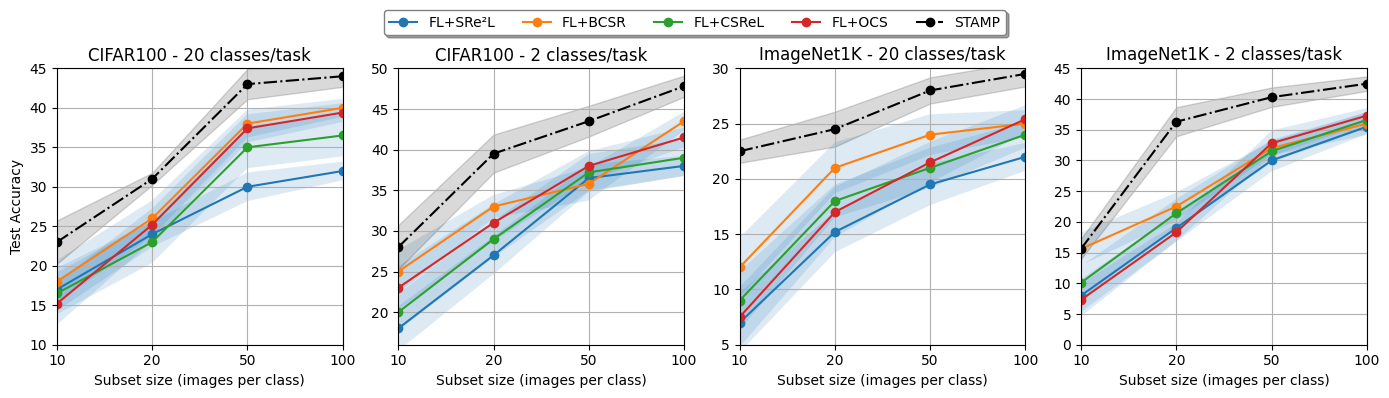

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Trục x: các mức độ dị biệt dữ liệu
x = ['10', '20', '50', '100']
x_ticks = np.arange(len(x))

data = {
    'FL+SRe²L': [[32, 30, 24, 17],          [38, 36.5, 27, 18],         [22, 19.5, 15.2,  7],       [35.5, 30, 19, 8]],
    'FL+BCSR':  [[40, 38, 26, 18],          [43.5, 35.8, 33, 25],       [25, 24, 21,  12],           [36, 32, 22.5, 15.6]],
    'FL+CSReL': [[36.5, 35, 23, 16.5],      [39, 37.2, 29, 20],         [24, 21, 18,  9],           [36.6, 31.5, 21.4, 10.1]],
    'FL+OCS':   [[39.4, 37.4, 25.2 , 15.2], [41.5, 38, 31, 23],         [25.4, 21.5, 17, 7.5],     [37.3, 32.8, 18.3,  7.3]],
    'STAMP':    [[44, 43, 31, 23],          [47.8, 43.5, 39.5, 28],     [29.5, 28, 24.5, 22.5],     [42.5, 40.3, 36.3,  15.6]],
}

variances = {
    'FL+SRe²L': [
        [7.4, 2.6, 3.3, 1.4],
        [7.5, 5.4, 2.9, 1.5],
        [7.3, 3.4, 3.5, 1.6],
        [7.1, 5.0, 3.2, 1.4],
    ],
    'FL+BCSR': [
        [7.2, 5.2, 3.1, 1.3],
        [7.1, 2.0, 4.2, 1.3],
        [7.2, 5.3, 3.4, 1.5],
        [7.1, 5.2, 1.3, 3.4],
    ],
    'FL+CSReL':
        [7.0, 5.1, #.2, 1.3],
        [7.1, 2.2, 3.3, 1.4],
        [7.3, 5.4, 3.5, 1.6],
        [7.1, 4.2, 3.3, 1.4],
    ],
    'FL+OCS': [
        [7.2, 4.3, 3.2, 1.4],
        [7.1, 5.2, 3.3, 1.5],
        [7.3, 5.2, 3.4, 1.6],
        [7.2, 2.1, 4.3, 1.5],
    ],
    'STAMP': [
        [7.5, 0.6, 3.7, 1.8],
        [7.4, 5.5, 3.6, 1.7],
        [1.1, 2.5, 1.4, 1.3],
        [2.7, 5.6, 2.5, 1.4],
    ]
}

for method in data:
    data[method] = [list(reversed(values)) for values in data[method]]

colors = {
    'FedAvg': 'blue',
    'FL+EWC': 'brown',
    'AFFCL': 'yellowgreen',
    'GLFC': 'pink',
    'FedCIL': 'green',
    'LANDER': 'red',
    'FedWeIT': 'purple',
    'FedSSI': 'orange',
    'TARGET': 'gray',
    'STAMP': 'Black',
    'FedL2P': 'cyan',
}
linestyles = {
    'STAMP': 'dashdot'
}
markers = {
    'FedSSI': 'o',
    'FedAvg': 'o',
    'FL+EWC': 'o',
    'AFFCL': 'o',
    'GLFC': 'o',
    'FedCIL': 'o',
    'LANDER': 'o',
    'FedWeIT': 'o',
    'FedSSI': 'o',
    'TARGET': 'o',
    'STAMP': 'o',
    'FedL2P': 'o',
}

titles = ['CIFAR100 - 20 classes/task', 'CIFAR100 - 2 classes/task', 'ImageNet1K - 20 classes/task', 'ImageNet1K - 2 classes/task']
y_lims = [(10, 45), (16, 50), (5, 30), (0, 45)]
x_lims = (0,3)

fig, axs = plt.subplots(1, 4, figsize=(14, 4), sharex=False)

for i, ax in enumerate(axs):
    for name, values in data.items():
        y = np.array(values[i])
        var = np.array(variances[name][i])
        std = np.sqrt(var)

        y_lower = y - std
        y_upper = y + std

        ax.plot(x_ticks, y, label=name, color=colors.get(name, None),
                linestyle=linestyles.get(name, '-'), marker=markers.get(name, 'o'))
        ax.fill_between(x_ticks, y_lower, y_upper, color=colors.get(name, None), alpha=0.15)

# for i, ax in enumerate(axs):
#     for name, values in data.items():
#         y = np.array(values[i])
#         line, = ax.plot(x_ticks, values[i], label=name, color=colors.get(name, None),
#                         linestyle=linestyles.get(name, '-'), marker=markers.get(name, ''))

#         error = np.random.uniform(1.0, 2.0, size=len(y))
#         y_lower = y - error
#         y_upper = y + error
#         ax.fill_between(x_ticks, y_lower, y_upper, color=colors.get(name, None), alpha=0.15)

    ax.set_title(titles[i])
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x)
    ax.set_ylim(y_lims[i])
    ax.set_xlim(x_lims)
    ax.set_xlabel("Subset size (images per class)")
    if i == 0:
        ax.set_ylabel("Test Accuracy")
    ax.grid(True)

# Chỉnh legend ở trên giữa
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.0),
    ncol=11,
    fontsize=10,
    frameon=True,              # Hiển thị khung
    fancybox=True,             # Làm tròn góc khung
    shadow=True,              # Không đổ bóng
    framealpha=1.0,            # Độ trong suốt của khung (1.0 là đậm)
    edgecolor='gray',          # Màu viền khung
    facecolor='white'          # Màu nền khung
)

fig.tight_layout(rect=[0, 0, 1, 0.93])  # Chừa không gian phía trên cho legend
plt.savefig('coreset_eval.pdf')
plt.show()